В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import theta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xlwings.pro.reports.filters import width

In [12]:
medical_df = pd.read_csv('/Users/macbook/Desktop/machine_learning_course/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

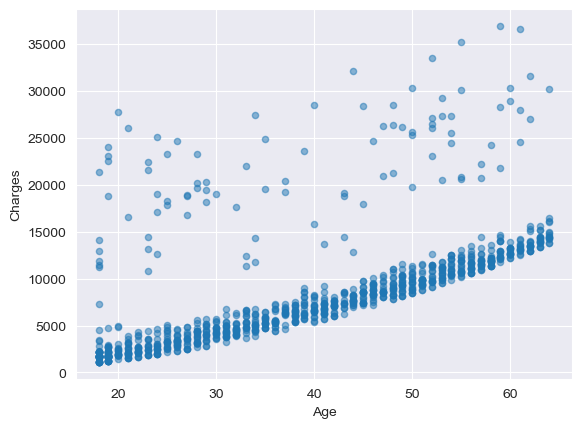

In [18]:
non_smoker_df.plot.scatter(x='age', y='charges', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Діаграма розсіювання показує, що для вибірки "некурців" спостерігається тенденція зростання медичних витрат зі збільшенням віку. Нижня сукупність точок щільно формують лінію, що схоже на лінійну регресію. Зверху - викиди.

In [24]:
# data
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values
# bias
X = np.c_[np.ones(len(X)), X]
XT = X.T
# linear regression Least-Squares method
theta = np.linalg.inv(XT.dot(X)).dot(XT).dot(y)
b, w = theta
print(X.shape)
print(y.shape)
print("Model parameters:")
print(f"Bias 'b' : {b:.2f}")
print(f"Weights 'w' : {w:.2f}")

(1064, 2)
(1064,)
Model parameters:
Bias 'b' : -2091.42
Weights 'w' : 267.25


In [27]:
y_predicted = X.dot(theta)


In [29]:
# RMSE
rmse = np.sqrt(np.mean((y - y_predicted)**2))
print(f"rmse: {rmse:.2f}")


rmse: 4662.51


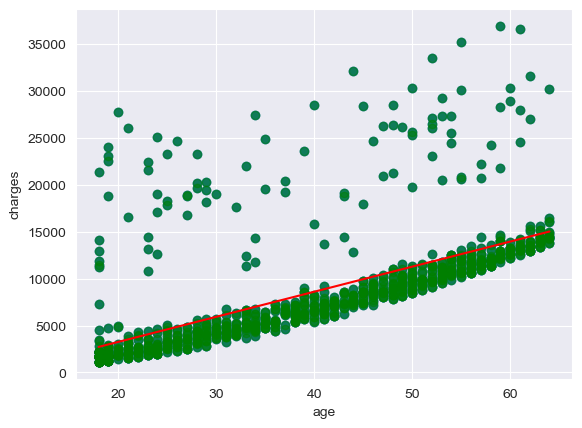

In [100]:
# visualization
plt.scatter(non_smoker_df['age'], non_smoker_df['charges'])
plt.scatter(non_smoker_df['age'], non_smoker_df['charges'], alpha=0.5, color='green')
# regression line
sorted_age = np.sort(non_smoker_df['age'])
charges_line = w * sorted_age + b
plt.plot(sorted_age, charges_line, color='red')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

Висновок: у результаті навчання моделі по одній ознаці видно, що модель дещо переоцінює медичні витрати для клієнтів з меншими витратами і недооцінює для пацієнтів з високим показником "charges". Це означає, що однієї ознаки для лінійної регресії замало, щоб коректно передбачити витрати.

In [59]:
# 2. full-batch gradient descent (Numpy)
X = non_smoker_df['age'].to_numpy().reshape(-1, 1)
y = non_smoker_df['charges'].to_numpy()
print("X shape:", X.shape, "y shape", y.shape)

X shape: (1064, 1) y shape (1064,)


In [63]:
def full_batch_gradient_descent(X, y, lr = 0.00001, epochs = 1000):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for epoch in range(epochs):
        y_predicted = m * X[:, 0] + b
        error = y_predicted - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [76]:
# learning rates
epochs = 100
lr_list = [0.000001, 0.00001, 0.0001]
m1, b1, errors1 = full_batch_gradient_descent(X, y, lr = lr_list[0], epochs = epochs)
m2, b2, errors2 = full_batch_gradient_descent(X, y, lr = lr_list[1], epochs = epochs)
m3, b3, errors3 = full_batch_gradient_descent(X, y, lr = lr_list[2], epochs = epochs)

print(f"lr = {lr_list[0]} | m = {m1:.4f}, b = {b1:.4f}, SSE = {errors1[-1]:.2f}")
print(f"lr = {lr_list[1]} | m = {m2:.4f}, b = {b2:.4f}, SSE = {errors2[-1]:.2f}")
print(f"lr = {lr_list[2]} | m = {m3:.4f}, b = {b3:.4f}, SSE = {errors3[-1]:.2f}")

lr = 1e-06 | m = 65.0867, b = 1.4180, SSE = 68716517021.72
lr = 1e-05 | m = 213.8208, b = 4.3394, SSE = 23737539205.37
lr = 0.0001 | m = 220.1546, b = 0.2130, SSE = 23657556610.11


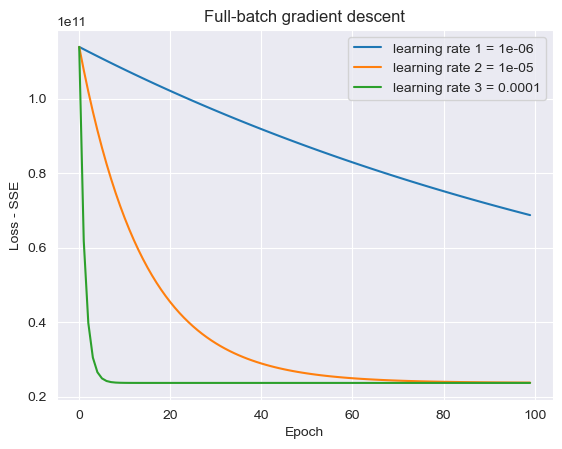

In [78]:
# visualisation
plt.plot(errors1, label = f'learning rate 1 = {lr_list[0]}')
plt.plot(errors2, label = f'learning rate 2 = {lr_list[1]}')
plt.plot(errors3, label = f'learning rate 3 = {lr_list[2]}')
plt.xlabel('Epoch')
plt.ylabel('Loss - SSE')
plt.title('Full-batch gradient descent')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
# RMSE for the best model
y_predicted_gradient = m3 * X[:, 0] + b3
rmse_gradient = np.sqrt(np.mean((y - y_predicted_gradient)**2))
print(f"rmse: {rmse_gradient:.2f}")

rmse: 4715.35


Висновок: Графік показує, що варіант, який представлено зеленою лінією (0.0001 з мого списку) є найбільш вдалим -- функція втрат зменшується найшвидше і виходить на плато. Тут модель навчається швидше за решту значень. У learning rate поставила 100 eпох, щоб краще було видно, тому що коли брала 1000+, то 2 лінії злипались. Для обраної моделі обчислено RMSE = 4715.35 (середня похибка прогнозу медичних витрат становить приблизно 4700$). Через те, що використовували лише одну ознаку (вік), отримали саме таку високу похибку.

In [85]:
# 3. Using sklearn linear regression
# create LR model
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [86]:
# model training
lin_reg.fit(X, y)

LinearRegression()

In [87]:
# Coefficients
weight = lin_reg.coef_[0]
bias = lin_reg.intercept_
print("Coefficients:")
print(f"weight: {weight:.2f}")
print(f"bias: {bias:.2f}")

Coefficients:
weight: 267.25
bias: -2091.42


In [88]:
# predictions
y_predicted = lin_reg.predict(X)


In [95]:
# RMSE
rmse_sklearn = mean_squared_error(y, y_predicted, squared=False)
print(f"rmse: {rmse_sklearn:.2f}")

rmse: 4662.51


/Users/macbook/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [97]:
# regression line
sorted_age = np.sort(non_smoker_df['age'].to_numpy())
charges_line_sklearn = weight * sorted_age + bias

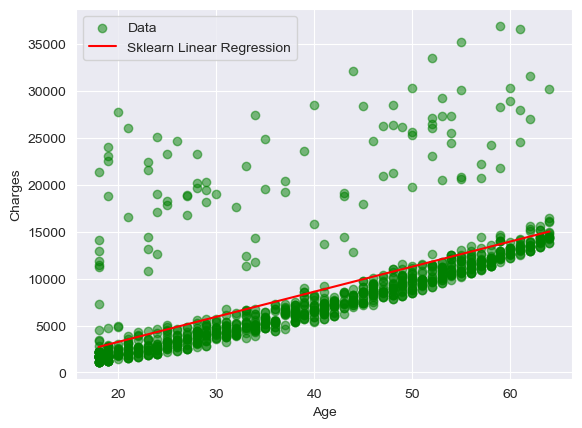

In [98]:
# visualization
plt.scatter(non_smoker_df['age'], non_smoker_df['charges'], alpha=0.5, color='green', label = 'Data')
plt.plot(sorted_age, charges_line_sklearn, color='red', label = 'Sklearn Linear Regression')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

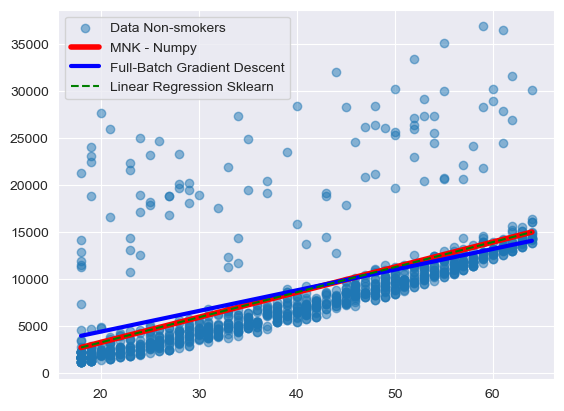

In [104]:
# all methods visualization
plt.scatter(X[:, 0], y, alpha=0.5, label='Data Non-smokers')
# MNK numpy
plt.plot(sorted_age, w * sorted_age + b, color='red', label = 'MNK - Numpy', linewidth=4)
# full-batch gradient descent
plt.plot(sorted_age, m3 * sorted_age + b3, color='blue', label = 'Full-Batch Gradient Descent', linewidth=3)
# sklearn
plt.plot(sorted_age, weight * sorted_age + bias, color='green', label = 'Linear Regression Sklearn', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

Висновок: результати майже збігаються з МНК та градієнтним спуском -- значить реалізація коректна.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [127]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df['smoker'].value_counts()

smoker
yes    274
Name: count, dtype: int64

In [128]:
X_smoke = smoker_df[['age']].to_numpy()
y_smoke = smoker_df['charges'].to_numpy()

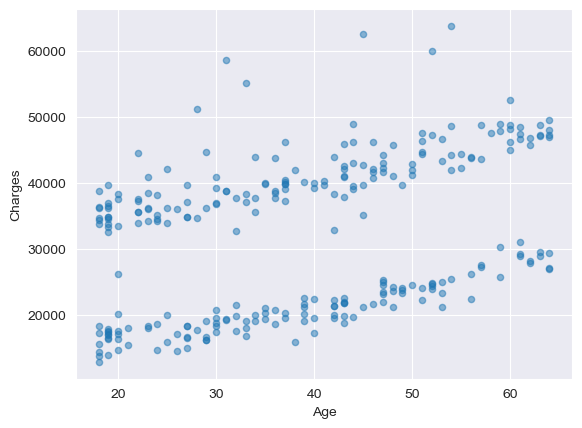

In [129]:
smoker_df.plot.scatter(x='age', y='charges', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Для курців розподіл за однією ознакою (вік) вийшов цікавий: маємо 2 групи точок, ніби як дві тенденції. Виходить, що однієї ознаки замало для цих даних, бо медичні витрати для курців залежать не тільки від віку.

In [130]:
# create LR model
lin_reg_smokers = LinearRegression()
lin_reg_smokers

LinearRegression()

In [131]:
lin_reg_smokers.fit(X_smoke, y_smoke)

LinearRegression()

In [132]:
# Coefficients
weight_smoke = lin_reg_smokers.coef_[0]
bias_smoke = lin_reg_smokers.intercept_
print("Coefficients:")
print(f"weight: {weight_smoke:.2f}")
print(f"bias: {bias_smoke:.2f}")

Coefficients:
weight: 305.24
bias: 20294.13


In [133]:
# predictions
y_smokers_predicted = lin_reg.predict(X_smoke)

In [134]:
# RMSE
rmse_smokers = mean_squared_error(y_smoke, y_smokers_predicted, squared=False)
print(f"rmse: {rmse_smokers:.2f}")

rmse: 26148.87


/Users/macbook/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [135]:
# regression line
sorted_age_smoker = np.sort(smoker_df['age'].to_numpy())
charges_line_smoker = weight_smoke * sorted_age_smoker + bias_smoke

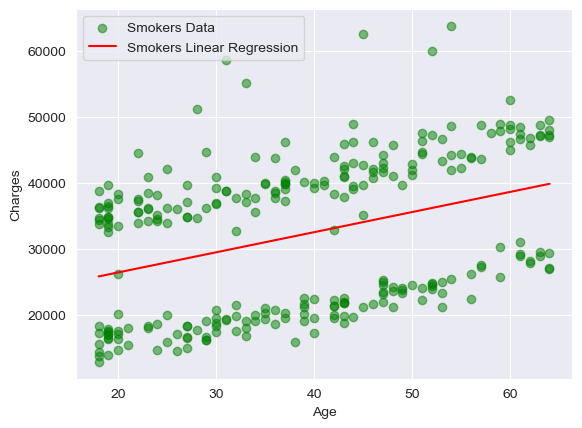

In [136]:
# visualization
plt.scatter(smoker_df['age'], smoker_df['charges'], alpha=0.5, color='green', label = 'Smokers Data')
plt.plot(sorted_age_smoker, charges_line_smoker, color='red', label = 'Smokers Linear Regression')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

Висновок: лінійна регресія з однією ознакою (вік) невдало відобразила прогноз для курців. На графіку дві групи точок, а пряма пролягає між ними, не перетинаючи їх. Співпала лише з поодинокими прикладами між цими групами. Вік не є достатньою ознакою для передбачення медичних витрат для курців.